# Curso: Aprendizaje Automático - Proyecto final (preliminar al 15 agosto)
## Alonso Nuñez / Sergio Castillo
## Fecha de entrega: 9 setiembre 2019

### Importar dependencias, y cargar el dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

import keras
from keras.utils import np_utils

data =  pd.read_csv('https://raw.githubusercontent.com/anunezcr/datasets/master/clientes_diarios_clasif.csv')

Using TensorFlow backend.


### Revisar el tamaño del data set y ver algunas instancias:

In [2]:
print("tamaño:",data.shape)
data.head(5)

tamaño: (22633, 14)


,id_tienda,tipo_tienda,provincia,supervisor,mes_del_anio,semana_del_anio,es_quincena,es_feriado,dia_de_la_semana,horas_operacion,pos_en_uso,clientes_totales,clientes_vip,volumen
0,12,FS,SAN JOSE,2015622_080,1,1,VERDADERO,Anio Nuevo,Lunes,11,4,210,23.0,medio
1,12,FS,SAN JOSE,2015622_080,1,1,VERDADERO,NO,Martes,11,4,306,17.0,alto
2,12,FS,SAN JOSE,2015622_080,1,1,VERDADERO,NO,Miercoles,11,4,203,12.0,medio
3,12,FS,SAN JOSE,2015622_080,1,1,FALSO,NO,Jueves,11,4,192,13.0,medio
4,12,FS,SAN JOSE,2015622_080,1,1,FALSO,NO,Viernes,12,4,229,16.0,medio


## Visualización de datos

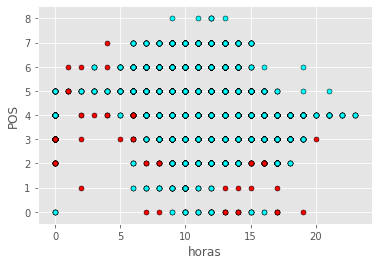

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import numpy as np
def plot_points(data):
    X = np.array(data[["horas_operacion","pos_en_uso"]])
    y = np.array(data["volumen"])
    alto = X[np.argwhere(y=="alto")]
    bajo = X[np.argwhere(y=="medio")]
    plt.scatter([s[0][0] for s in bajo], [s[0][1] for s in bajo], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in alto], [s[0][1] for s in alto], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('horas')
    plt.ylabel('POS')
plot_points(data)
plt.show()

### Elegir qué columnas usar:

In [4]:
#Versión1, usar 7 features
#cols_to_use = ['tipo_tienda', 'provincia', 'dia_de_la_semana','horas_operacion','pos_en_uso','es_quincena', 'mes_del_anio','volumen']

#Versión2, usar 5 features
cols_to_use = ['tipo_tienda', 'provincia', 'dia_de_la_semana','horas_operacion','pos_en_uso','volumen']

data = data[cols_to_use]
print("tamaño:",data.shape)
data.head(10)

tamaño: (22633, 6)


,tipo_tienda,provincia,dia_de_la_semana,horas_operacion,pos_en_uso,volumen
0,FS,SAN JOSE,Lunes,11,4,medio
1,FS,SAN JOSE,Martes,11,4,alto
2,FS,SAN JOSE,Miercoles,11,4,medio
3,FS,SAN JOSE,Jueves,11,4,medio
4,FS,SAN JOSE,Viernes,12,4,medio
5,FS,SAN JOSE,Sabado,15,4,medio
6,FS,SAN JOSE,Domingo,16,4,medio
7,FS,SAN JOSE,Lunes,12,4,medio
8,FS,SAN JOSE,Martes,11,4,medio
9,FS,SAN JOSE,Miercoles,10,4,medio


# Inicia Pre-Procesado

### Convertir features de texto en numéricos (pero aún categóricos)

In [5]:
data['provincia'] = data['provincia'].replace({'SAN JOSE' : 0,'ALAJUELA' : 1,'CARTAGO' : 2,'HEREDIA' : 3,'LIMON' : 4,'GUANACASTE' : 5,'PUNTARENAS' : 6})
data['dia_de_la_semana'] = data['dia_de_la_semana'].replace({'Lunes' : 0,'Martes' : 1,'Miercoles' : 2,'Jueves' : 3,'Viernes' : 4,'Sabado' : 5,'Domingo' : 6})
data['volumen'] = data['volumen'].replace({'alto' : 0,'medio' : 1,'bajo' : 2})
data['tipo_tienda'] = data['tipo_tienda'].replace({'FS' : 0,'IS' : 1,'Mall' : 2})

#comentar la siguiente linea si se usa version2 (5 features)
#data['es_quincena'] = data['es_quincena'].replace({' VERDADERO ' : 1,' FALSO ' : 0})

### Eliminar outliers

In [6]:
#FALTA...

### Convertir datos categóricos - One-hot encoding

In [7]:
# One-hot encoding

# para usar 7 features:
#processed_data = pd.get_dummies(data, columns=['tipo_tienda', 'provincia','dia_de_la_semana','mes_del_anio','volumen'])

# para usar 5 features:
processed_data = pd.get_dummies(data, columns=['tipo_tienda', 'provincia','dia_de_la_semana','volumen'])


# Splitting the data input into X, and the labels y 
X = np.array(processed_data)[:,0:18]
X = X.astype('float32')
y = keras.utils.to_categorical(data["volumen"],3)


### Normalizar features horas_operacion y pos_en_uso

In [8]:
# Normalizing horas_operacion and the pos_en_uso to be in the interval (0,1)
processed_data["horas_operacion"] = processed_data["horas_operacion"]/24
processed_data["pos_en_uso"] = processed_data["pos_en_uso"]/10

### Borrar NaNs

In [9]:
print ("shape antes: ", processed_data.shape)
print ("\n¿hay Nans? ",processed_data.isnull().values.any())   #preguntar si hay NaN
# remove NaNs
processed_data = processed_data.dropna()
print ("\nshape después: ", processed_data.shape)

shape antes:  (22633, 21)

¿hay Nans?  False

shape después:  (22633, 21)


### Revisar cómo quedó después de preocesado

In [10]:
#data = processed_data
print("tamaño:",processed_data.shape)
print (processed_data.head(5))

tamaño: (22633, 21)
   horas_operacion  pos_en_uso  tipo_tienda_0  tipo_tienda_1  tipo_tienda_2  \
0         0.458333         0.4              1              0              0   
1         0.458333         0.4              1              0              0   
2         0.458333         0.4              1              0              0   
3         0.458333         0.4              1              0              0   
4         0.500000         0.4              1              0              0   

   provincia_0  provincia_1  provincia_2  provincia_3  provincia_4  ...  \
0            1            0            0            0            0  ...   
1            1            0            0            0            0  ...   
2            1            0            0            0            0  ...   
3            1            0            0            0            0  ...   
4            1            0            0            0            0  ...   

   dia_de_la_semana_0  dia_de_la_semana_1  dia_de_la_s

# Inicia el trabajo con los modelos elegidos, que serán:
   **DecisionTree**

   **RandomForest**
   
   **Redes Neuronales ANN**

Determinar cuáles columnas son features y cuáles labels.

En este caso las clases están dadas por "volumen" que indica si es un día alto volumen (cantidad de clientes), medio o bajo

In [11]:

# Splitting the data input into X, and the labels y 
features = np.array(processed_data)[:,0:18]
features = features.astype('float32')
labels = keras.utils.to_categorical(data["volumen"],3)

print("Shape of features:", features.shape)
print("\nShape of labels:", labels.shape)
print("\nFirst 5 rows of features")
print(features[:5])
print("\nFirst 5 rows of labels")
print(labels[:5])



Shape of features: (22633, 18)

Shape of labels: (22633, 3)

First 5 rows of features
[[0.45833334 0.4        1.         0.         0.         1.
  0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.         0.         0.        ]
 [0.45833334 0.4        1.         0.         0.         1.
  0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.         0.         0.        ]
 [0.45833334 0.4        1.         0.         0.         1.
  0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.         0.         0.        ]
 [0.45833334 0.4        1.         0.         0.         1.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.        ]
 [0.5        0.4        1.         0.         0.         1.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1. 

Separa set de entrenamiento y set de pruebas
Con una proporción 75% - 25%

In [12]:
X_train,X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state = 13) 

In [13]:
print ("shape del dataset completo: ", processed_data.shape)
print ("\nshape del set de entrenamiento: ", X_train.shape)
print ("\nshape del set de pruebas: ", y_test.shape)

shape del dataset completo:  (22633, 21)

shape del set de entrenamiento:  (16974, 18)

shape del set de pruebas:  (5659, 3)


## Modelo clasificador usando DecisionTree

In [14]:
DecisionTreeModel = DecisionTreeClassifier(max_depth=10,min_samples_leaf=12)

#entrenamiento
print(DecisionTreeModel.fit(X_train, y_train))

#prediccion (usar datos de test)
y_predict = DecisionTreeModel.predict(X_test)

print("\nAccuracy para DecisionTree: {:.4f}".format(accuracy_score(y_test, y_predict)))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Accuracy para DecisionTree: 0.8597


## Modelo clasificador usando RandomForest

In [15]:
RandomForestModel = RandomForestClassifier(min_samples_leaf=3, min_samples_split=10, n_estimators=290, max_depth = 14, random_state = 10)

#entrenamiento
print(RandomForestModel.fit(X_train, y_train))

#prediccion (usar datos de test)
y_predict = RandomForestModel.predict(X_test)

print("\nAccuracy para Random Forest:     {:.4f}".format(accuracy_score(y_test, y_predict)))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=290,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

Accuracy para Random Forest:     0.8669


### Podríamos decir que Random Forest tuvo el mejor score que Decision Tree (86.69% vrs 85.97)

### Mejores resultados para DecisionTree

Método | Features | Profundidad Max | Resultado | Mejores resultados
------------ | ------------- | ------------- | ------------- | ------------- 
DT | 7 | 5| 78.95% | 
DT | 7 | 9 | 85.97% | 
DT | 7 | 12 | 86.08% | 
DT | 7 | 13 | 86.15% |  ** mejor en v1
-- | -- | -- | -- | 
DT | 5 | 3 | 77.38% | 
DT | 5 | 8 | 84.94% | 
DT | 5 | 10 | 85.97% | ** mejor en v2
DT | 5 | 12 | 85.65% | 

### Mejores resultados para RandomForest

Método | Features | Leaf | Split | Estimators | Profundidad Max | Resultado  | Mejores resultados
------------ | ------------- | ------------- | -------------  | -------------  | -------------  | -------------  | ------------- 
RF | 7 | 3 | 17 | 290 | None | 86.46% |  ** mejor en v1
RF | 7 | 3 | 10 | 290 | 14 | 86.22% | 
RF | 7 | 3 | 13 | 290 | 15 | 86.38% |
-- | -- | -- | -- |  -- |  -- |  -- |
RF | 5 | 3 | 10 | 290 | None | 86.62% |
RF | 5 | 3 | 10 | 290 | 14 | 86.69% | ** mejor en v2
RF | 5 | 3 | 10 | 300 | None | 86.61% | 
RF | 5 | 5 | 10 | 300 | None | 86.46% | 
RF | 5 | 10 | 10 | 300 | None | 86.43% |



## Modelo clasificador usando Redes Neuronales

In [16]:
#FALTA...